In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv


# Data Exploration

In [2]:
import pandas as pd

df = pd.read_csv("/kaggle/input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df = df.rename(columns={'default.payment.next.month': 'default'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_0      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

Content
There are 25 variables:

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

In [4]:
# Drop the ID column that it is not be relevant in classification
if 'ID' in df.columns:
    df.drop('ID', axis=1, inplace=True)

## Column [default.payment.next.month]

In [5]:
import plotly.express as px

# Distribution of Data
fig_default = px.pie(df, 
                 names = df['default'].value_counts().reset_index().index,
                 values = df['default'].value_counts().reset_index()['default'], 
                 title = "Data Distribution for Credit Default", width=400, height=400) 
fig_default.show()

# Data Preprocessing

## Data Cleaning

### Column [EDUCATION']

In [6]:
# EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
lim_bal = df['LIMIT_BAL'].groupby(by=df['EDUCATION'].replace({1:"1_Graduate School",2:"2_University", 3:"3_Highschool", 4:"4_Others"})).mean()
limit_data=pd.DataFrame(lim_bal).reset_index()

In [7]:
# EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
lim_bal = df['LIMIT_BAL'].groupby(by=df['EDUCATION']).mean()
limit_data=pd.DataFrame(lim_bal).reset_index()

edu_map = lambda x: 'Graduate School' if x == 1 else "Unversity" if x == 2 else "High School" if x == 3 else "Other" if x == 4 else "Unknown"
limit_data['EDUCATION_DESC'] = limit_data['EDUCATION'].apply(edu_map)
limit_data = limit_data[['EDUCATION', 'EDUCATION_DESC', 'LIMIT_BAL']]
display(limit_data[limit_data['EDUCATION_DESC']!="Unknown"])

,EDUCATION,EDUCATION_DESC,LIMIT_BAL
1,1,Graduate School,212956.069910
2,2,Unversity,147062.437634
3,3,High School,126550.270490
4,4,Other,220894.308943


In [8]:
print(f"Total Number of Dataset: {len(df)}")
# Rows with Education = 0, 5, 6
unknown_edu = len(df[df['EDUCATION']==0]) + len(df[df['EDUCATION']==5]) + len(df[df['EDUCATION']==6])
print(f"Total Number of rows that that Education value of 0, 5, and 6: {unknown_edu}")

Total Number of Dataset: 30000
Total Number of rows that that Education value of 0, 5, and 6: 345


In [9]:
# Drop the rows with Unknown Education
unk_edu_rows = df[(df['EDUCATION'] == 0) | (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6)]
df = df.drop(unk_edu_rows.index)

In [10]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      123
Name: EDUCATION, dtype: int64

### Column [SEX]
Gender (1=male, 2=female)

In [11]:
display(df['SEX'].value_counts())

2    17895
1    11760
Name: SEX, dtype: int64

### Column [MARRIAGE]
Marital status (1=married, 2=single, 3=others)

In [12]:
# MARRIAGE: 
display(df['MARRIAGE'].value_counts())

# Drop the rows with Unknown Education
unk_marriage_rows = df[df['MARRIAGE'] == 0]
df = df.drop(unk_marriage_rows.index)

2    15806
1    13477
3      318
0       54
Name: MARRIAGE, dtype: int64

In [13]:
df['MARRIAGE'].value_counts()

2    15806
1    13477
3      318
Name: MARRIAGE, dtype: int64

## Data Split
- Technique used
    - Split X and y into train and test with equal distribution of y (using stratify hp)
    - Oversampling (SMOTE)
        - Synthetic Minority Over-Sampling Technique
        - It generates synthetic samples by interpolating between existing minority class samples
        - It identifies minority samples and finds k-nearest neighbors in the feature space, then it generates new samples by randomly selecting one of the k-nearest neighbors

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
RANDOM_STATE = 42

def split_data(df, test_size = 0.2):
    X = df.drop('default',axis=1).to_numpy()
    y = df['default'].to_numpy()

    # Create Train and Test Datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,stratify=y,random_state=RANDOM_STATE)
    # Display the distribution
    print("Original")
    display(np.array(np.unique(y_train, return_counts=True)).T)
    
    # SMOTE
    # Create an instance of the SMOTE class
    smote = SMOTE(random_state=RANDOM_STATE)

    # Fit the SMOTE model on the training data
    X_train, y_train = smote.fit_resample(X_train, y_train)
    # Display the distribution
    print("After Oversampling")
    display(np.array(np.unique(y_train, return_counts=True)).T)
    
    return X_train, X_test, y_train, y_test

In [15]:
X_train, X_test, y_train, y_test = split_data(df, 0.2)

Original


array([[    0, 18396],
       [    1,  5284]])

After Oversampling


array([[    0, 18396],
       [    1, 18396]])

# Model Training

Because we are trying not to misclassify Credit Default case as False,
we need to minimize the Recall, and Recall could be a better selection for scoring metrics
while f1 score takes care about both False Negative and False Positive
and accuracy takes care all the other equally.

In [16]:
# Models compared
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

# Training
## Metrics
from sklearn.model_selection import learning_curve, cross_val_score
## Scale the Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
## Dimensionality Reduction
from sklearn.decomposition import PCA, FastICA
## Model Deployment
from sklearn.pipeline import Pipeline
## Util
import time
from numpy import mean

## Cross Validation

In [17]:
from sklearn.model_selection import cross_validate

scoring = {'f1': 'f1_weighted',
           'recall': 'recall_weighted',
           'roc_auc': 'roc_auc'}
cv = 5
    
def run_experiment(pipe, X, y, scoring, cv, metrics=None):
    if metrics is None:
        metrics = {}
        metrics['fit_time'] = {}
        for scoring_key in scoring:
            metrics[scoring_key] = {}
        
    # Extract model name from pipeline
    model_name = pipe.steps[-1][0]
    print(f"Working on {model_name}")
    # Cross Validate
    cv_results = cross_validate(estimator = pipe, X = X, y = y,
                                scoring = scoring, cv = 5,
                                return_train_score = False, n_jobs= -1, verbose=False)
    # Save in evaluation metrics
    for key in scoring:
        scoring_key = f"test_{key}"
        metrics[key][model_name] = mean(cv_results[scoring_key])
    metrics['fit_time'][model_name] = mean(cv_results['fit_time'])
    
    return metrics

def display_results(metrics, scoring='f1'):
    # create a bar chart with automatic color assignment
    fig = px.bar(x=list(metrics[scoring].keys()), 
                 y=list(metrics[scoring].values()), 
                 text = np.around(list(metrics[scoring].values()), 3), 
                 color=list(metrics[scoring].keys()),
                 width=600, height=350)
    # Update layout
    fig.update_layout(title=scoring, xaxis_title='models', yaxis_title=scoring)

    # show the plot
    fig.show()

### Simply cross vaidate (no scaling)

In [18]:
lr_pipeline = Pipeline([
    #('scaler', StandardScaler()),
    ('lr', LogisticRegression(class_weight='balanced'))
])

knn_pipeline = Pipeline([
    #('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=2, n_jobs=-1))
])

svm_pipeline = Pipeline([
    #('scaler', StandardScaler()),
    ('svm', LinearSVC(dual=False, random_state = RANDOM_STATE, class_weight="balanced"))
])

nb_pipeline = Pipeline([
    #('scaler', StandardScaler()),
    ('nb', GaussianNB())
])

dt_pipeline = Pipeline([
    #('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier(random_state = RANDOM_STATE, class_weight="balanced"))
])

rf_pipeline = Pipeline([
    #('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state = RANDOM_STATE, class_weight="balanced", n_jobs=-1))
])

xgb_pipeline = Pipeline([
    #('scaler', StandardScaler()),
    ('xgb', XGBClassifier(n_estimators=100))
])


lgb_pipeline = Pipeline([
    #('scaler', StandardScaler()),
    ('lgb', lgb.LGBMClassifier(random_state = RANDOM_STATE, class_weight="balanced", n_jobs=-1))
])

In [19]:
eval_metrics_1 = {}
eval_metrics_1['fit_time'] = {}
for scoring_key in scoring:
    eval_metrics_1[scoring_key] = {}
    
eval_metrics_1 = run_experiment(lr_pipeline, X_train, y_train, scoring, cv, eval_metrics_1)
eval_metrics_1 = run_experiment(knn_pipeline, X_train, y_train, scoring, cv, eval_metrics_1)
eval_metrics_1 = run_experiment(svm_pipeline, X_train, y_train, scoring, cv, eval_metrics_1)
eval_metrics_1 = run_experiment(nb_pipeline, X_train, y_train, scoring, cv, eval_metrics_1)
eval_metrics_1 = run_experiment(dt_pipeline, X_train, y_train, scoring, cv, eval_metrics_1)
eval_metrics_1 = run_experiment(rf_pipeline, X_train, y_train, scoring, cv, eval_metrics_1)
eval_metrics_1 = run_experiment(xgb_pipeline, X_train, y_train, scoring, cv, eval_metrics_1)
eval_metrics_1 = run_experiment(lgb_pipeline, X_train, y_train, scoring, cv, eval_metrics_1)

Working on lr
Working on knn
Working on svm
Working on nb
Working on dt
Working on rf
Working on xgb
Working on lgb


In [20]:
for scoring_key in scoring:
    display_results(eval_metrics_1, scoring_key)
display_results(eval_metrics_1, 'fit_time')

### Cross vaidate with Scaling

In [21]:
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(class_weight='balanced'))
])

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=2, n_jobs=-1))
])

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', LinearSVC(dual=False, random_state = RANDOM_STATE, class_weight="balanced"))
])

nb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('nb', GaussianNB())
])

dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier(random_state = RANDOM_STATE, class_weight="balanced"))
])

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state = RANDOM_STATE, class_weight="balanced", n_jobs=-1))
])

xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(n_estimators=100))
])


lgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lgb', lgb.LGBMClassifier(random_state = RANDOM_STATE, class_weight="balanced", n_jobs=-1))
])

In [22]:
eval_metrics_2 = {}
eval_metrics_2['fit_time'] = {}
for scoring_key in scoring:
    eval_metrics_2[scoring_key] = {}
    
eval_metrics_2 = run_experiment(lr_pipeline, X_train, y_train, scoring, cv, eval_metrics_2)
eval_metrics_2 = run_experiment(knn_pipeline, X_train, y_train, scoring, cv, eval_metrics_2)
eval_metrics_2 = run_experiment(svm_pipeline, X_train, y_train, scoring, cv, eval_metrics_2)
eval_metrics_2 = run_experiment(nb_pipeline, X_train, y_train, scoring, cv, eval_metrics_2)
eval_metrics_2 = run_experiment(dt_pipeline, X_train, y_train, scoring, cv, eval_metrics_2)
eval_metrics_2 = run_experiment(rf_pipeline, X_train, y_train, scoring, cv, eval_metrics_2)
eval_metrics_2 = run_experiment(xgb_pipeline, X_train, y_train, scoring, cv, eval_metrics_2)
eval_metrics_2 = run_experiment(lgb_pipeline, X_train, y_train, scoring, cv, eval_metrics_2)

Working on lr
Working on knn
Working on svm
Working on nb
Working on dt
Working on rf
Working on xgb
Working on lgb


In [23]:
for scoring_key in scoring:
    display_results(eval_metrics_2, scoring_key)
display_results(eval_metrics_2, 'fit_time')

In [24]:
print("Without Scaling")
display_results(eval_metrics_1, 'recall')
print("With Scaling")
display_results(eval_metrics_2, 'recall')

Without Scaling


With Scaling


Above experiments showed that Scaling actually improved Recall for Logistic Regression, KNN, SVM, and Naive Bayes <br>
while did not improve for Random Forest and gradient boostings (XGBoost, LightGradientBoost)

- **Random Forest** performs the best in both f1 and recall. <br>
- Because identifying Credit default is a sentitive issue, **recall** is a good indicator for the model to minimize **False Negative**
- **KNN** also showed good performance while taking relatively short amount of time for fitting

# Improving Model
- Feature Creation
    - Bill and Payment slope creatoin
    - Mean and std for 3 month of period for Bill and Previous payment
- Dimensionality Reduction
    - PCA and ICA

## 1st Trial: Bill and Payment slopes and their relationships
Result: It did not make any improvement and did not show correlation.

In [25]:
'''
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
'''
bill_cols = ["BILL_AMT6", "BILL_AMT5", "BILL_AMT4", "BILL_AMT3", "BILL_AMT2", "BILL_AMT1"]
payment_cols = ["PAY_AMT6", "PAY_AMT5", "PAY_AMT4", "PAY_AMT3", "PAY_AMT2", "PAY_AMT1"]
new_df = df.copy()

In [26]:
def slope_function(row, cols):
    values = row[cols].values
    x = list(range(1, len(cols)+1))
    z = np.polyfit(x, values, 1)
    return z[0]

new_df['BILL_SLOPE'] = new_df.apply(lambda row: slope_function(row, bill_cols), axis=1)
new_df['PAYMENT_SLOPE'] = new_df.apply(lambda row: slope_function(row, payment_cols), axis=1)

In [27]:
def calc_slope_ratio(row):
    if abs(row['BILL_SLOPE']) > 0.1:
        slope_ratio = row['PAYMENT_SLOPE'] / row['BILL_SLOPE']
    else:
        slope_ratio = 0
    return slope_ratio
        
new_df['SLOPE_RATIO'] = new_df.apply(lambda row: calc_slope_ratio(row), axis=1)

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def show_distribution(df, col_name):
    # Generate some example data
    x = df[col_name]
    y = df['default']

    # Define a colormap
    cmap = plt.cm.get_cmap('coolwarm')

    # Create the scatter plot with different colors based on y-value
    plt.scatter(x, y, c=y, cmap=cmap)

    # Add a colorbar to show the mapping between y-values and colors
    cbar = plt.colorbar()
    cbar.set_label('Y-Value')

    # Add axis labels and a title
    plt.xlabel(col_name)
    plt.ylabel('Default')
    plt.title('Scatter Plot with Different Colors Based on Default')

    # Show the plot
    plt.show()

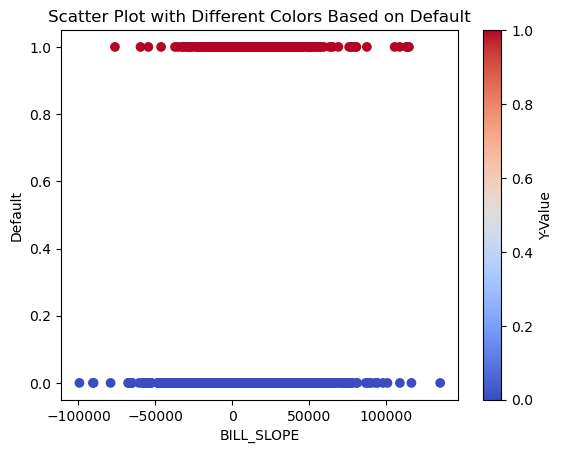

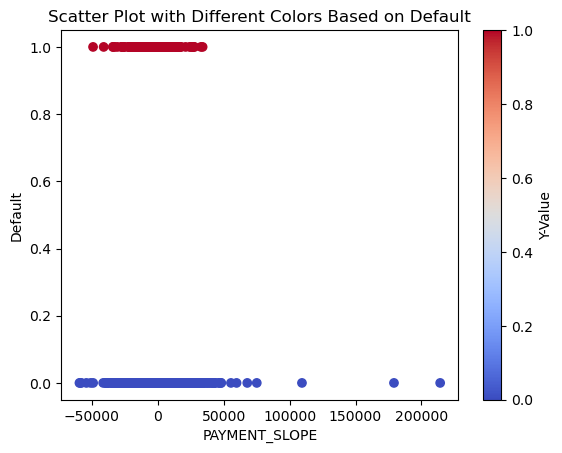

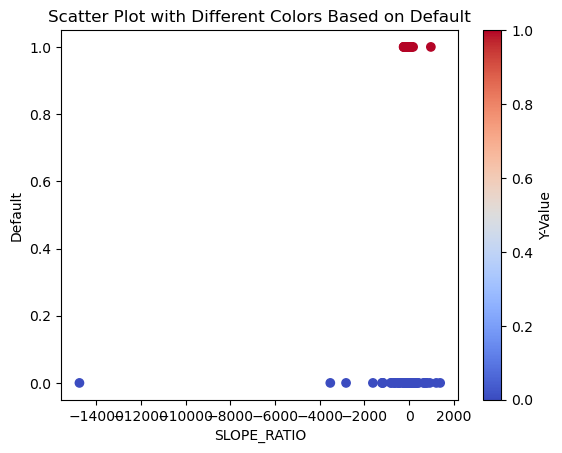

In [29]:
show_distribution(new_df, 'BILL_SLOPE')
show_distribution(new_df, 'PAYMENT_SLOPE')
show_distribution(new_df, 'SLOPE_RATIO')

In [30]:
# Drop Bill and Previous Payment Columns
X_train, X_test, y_train, y_test = split_data(new_df.drop(bill_cols + payment_cols, axis=1), 0.2)

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state = RANDOM_STATE, class_weight="balanced", n_jobs=-1))
])

eval_metrics = run_experiment(rf_pipeline, X_train, y_train, scoring, cv, None)
print("Evaluation Metrics")
print(pd.DataFrame(eval_metrics))

Original


array([[    0, 18396],
       [    1,  5284]])

After Oversampling


array([[    0, 18396],
       [    1, 18396]])

Working on rf
Evaluation Metrics
     fit_time        f1    recall   roc_auc
rf  20.100145  0.856285  0.866853  0.935805


Above experiment showed that payment and bill slopes and slop ratio cannot substitute payment and bill information.

In [31]:
# Use Bill and Previous Payment Columns as well
X_train, X_test, y_train, y_test = split_data(new_df, 0.2)

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state = RANDOM_STATE, class_weight="balanced", n_jobs=-1))
])

eval_metrics = run_experiment(rf_pipeline, X_train, y_train, scoring, cv, None)
print("Evaluation Metrics")
print(pd.DataFrame(eval_metrics))

Original


array([[    0, 18396],
       [    1,  5284]])

After Oversampling


array([[    0, 18396],
       [    1, 18396]])

Working on rf
Evaluation Metrics
     fit_time       f1  recall   roc_auc
rf  41.557381  0.86107   0.869  0.942761


## 2nd Trial: Mean values for three months long for Billing and Previous Payment
Result: It did not make any improvement

In [32]:
new_df = df.copy()

bill_cols = ["BILL_AMT6", "BILL_AMT5", "BILL_AMT4", "BILL_AMT3", "BILL_AMT2", "BILL_AMT1"]
payment_cols = ["PAY_AMT6", "PAY_AMT5", "PAY_AMT4", "PAY_AMT3", "PAY_AMT2", "PAY_AMT1"]

for i in range(len(bill_cols)-2):
    num_list = [str(number) for number in range(4+i, 4+i+3)]
    col_name_nums = ''.join(num_list)
    bills = bill_cols[i: i+3]
    payments = payment_cols[i: i+3]
    new_df['BILL'+col_name_nums] = new_df[bills].mean(axis=1)
    new_df['PAYMENT'+col_name_nums] = new_df[payments].mean(axis=1)

In [33]:
# Drop Bill and Previous Payment Columns
X_train, X_test, y_train, y_test = split_data(new_df.drop(bill_cols + payment_cols, axis=1), 0.2)

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state = RANDOM_STATE, class_weight="balanced", n_jobs=-1))
])

eval_metrics = run_experiment(rf_pipeline, X_train, y_train, scoring, cv, None)
print("Evaluation Metrics")
print(pd.DataFrame(eval_metrics))

Original


array([[    0, 18396],
       [    1,  5284]])

After Oversampling


array([[    0, 18396],
       [    1, 18396]])

Working on rf
Evaluation Metrics
     fit_time        f1    recall   roc_auc
rf  31.078117  0.857776  0.866772  0.939976


In [34]:
# Use Bill and Previous Payment Columns as well
X_train, X_test, y_train, y_test = split_data(new_df, 0.2)

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state = RANDOM_STATE, class_weight="balanced", n_jobs=-1))
])

eval_metrics = run_experiment(rf_pipeline, X_train, y_train, scoring, cv, eval_metrics)
print("Evaluation Metrics")
print(pd.DataFrame(eval_metrics))

Original


array([[    0, 18396],
       [    1,  5284]])

After Oversampling


array([[    0, 18396],
       [    1, 18396]])

Working on rf
Evaluation Metrics
     fit_time        f1    recall   roc_auc
rf  44.228695  0.862078  0.869407  0.943954


## 3rd Trial: Apply PCA / ICA (Dimensionality Reduction)
Result: PCA and ICA did not make any improvement

In [35]:
X_train, X_test, y_train, y_test = split_data(df, 0.2)
# n_component = 5
n_component = 5
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_component)),
    ('rf', RandomForestClassifier(random_state = RANDOM_STATE, class_weight="balanced", n_jobs=-1))
])

eval_metrics = run_experiment(rf_pipeline, X_train, y_train, scoring, cv, None)
print(f"\nEvaluation Metrics after PCA with n_component = {n_component}")
print(pd.DataFrame(eval_metrics))

# n_component = 10
n_component = 10
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_component)),
    ('rf', RandomForestClassifier(random_state = RANDOM_STATE, class_weight="balanced", n_jobs=-1))
])

eval_metrics = run_experiment(rf_pipeline, X_train, y_train, scoring, cv, None)
print(f"\nEvaluation Metrics after PCA with n_component = {n_component}")
print(pd.DataFrame(eval_metrics))

# n_component = 15
n_component = 15
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_component)),
    ('rf', RandomForestClassifier(random_state = RANDOM_STATE, class_weight="balanced", n_jobs=-1))
])

eval_metrics = run_experiment(rf_pipeline, X_train, y_train, scoring, cv, None)
print(f"\nEvaluation Metrics after PCA with n_component = {n_component}")
print(pd.DataFrame(eval_metrics))

# n_component = 20
n_component = 20
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_component)),
    ('rf', RandomForestClassifier(random_state = RANDOM_STATE, class_weight="balanced", n_jobs=-1))
])

eval_metrics = run_experiment(rf_pipeline, X_train, y_train, scoring, cv, None)
print(f"\nEvaluation Metrics after PCA with n_component = {n_component}")
print(pd.DataFrame(eval_metrics))

Original


array([[    0, 18396],
       [    1,  5284]])

After Oversampling


array([[    0, 18396],
       [    1, 18396]])

Working on rf

Evaluation Metrics after PCA with n_component = 5
    fit_time        f1   recall  roc_auc
rf  31.17903  0.777379  0.77778  0.85219
Working on rf

Evaluation Metrics after PCA with n_component = 10
     fit_time       f1    recall   roc_auc
rf  45.807479  0.82063  0.821214  0.895816
Working on rf

Evaluation Metrics after PCA with n_component = 15
     fit_time        f1    recall  roc_auc
rf  46.114469  0.841853  0.842468  0.91299
Working on rf

Evaluation Metrics after PCA with n_component = 20
     fit_time        f1    recall   roc_auc
rf  64.183991  0.850946  0.851873  0.919754


In [36]:
# FastICA
# n_component = 5
n_component = 5
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ica', FastICA(n_components=n_component)),
    ('rf', RandomForestClassifier(random_state = RANDOM_STATE, class_weight="balanced", n_jobs=-1))
])

eval_metrics = run_experiment(rf_pipeline, X_train, y_train, scoring, cv, None)
print(f"\nEvaluation Metrics after ICA with n_component = {n_component}")
print(pd.DataFrame(eval_metrics))

# n_component = 10
n_component = 10
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ica', FastICA(n_components=n_component)),
    ('rf', RandomForestClassifier(random_state = RANDOM_STATE, class_weight="balanced", n_jobs=-1))
])

eval_metrics = run_experiment(rf_pipeline, X_train, y_train, scoring, cv, None)
print(f"\nEvaluation Metrics after ICA with n_component = {n_component}")
print(pd.DataFrame(eval_metrics))

# n_component = 15
n_component = 15
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ica', FastICA(n_components=n_component)),
    ('rf', RandomForestClassifier(random_state = RANDOM_STATE, class_weight="balanced", n_jobs=-1))
])

eval_metrics = run_experiment(rf_pipeline, X_train, y_train, scoring, cv, None)
print(f"\nEvaluation Metrics after ICA with n_component = {n_component}")
print(pd.DataFrame(eval_metrics))

# n_component = 20
n_component = 20
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ica', FastICA(n_components=n_component)),
    ('rf', RandomForestClassifier(random_state = RANDOM_STATE, class_weight="balanced", n_jobs=-1))
])

eval_metrics = run_experiment(rf_pipeline, X_train, y_train, scoring, cv, None)
print(f"\nEvaluation Metrics after ICA with n_component = {n_component}")
print(pd.DataFrame(eval_metrics))

Working on rf

Evaluation Metrics after ICA with n_component = 5
     fit_time        f1    recall   roc_auc
rf  30.706351  0.788023  0.788489  0.862979
Working on rf

Evaluation Metrics after ICA with n_component = 10
     fit_time       f1    recall   roc_auc
rf  43.474689  0.83169  0.832657  0.907858
Working on rf

Evaluation Metrics after ICA with n_component = 15
     fit_time        f1    recall   roc_auc
rf  44.480596  0.860575  0.862583  0.929619
Working on rf

Evaluation Metrics after ICA with n_component = 20
     fit_time       f1    recall   roc_auc
rf  59.077767  0.86205  0.864295  0.930733


# Hyperparameter Search

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score

rf = RandomForestClassifier(random_state = RANDOM_STATE, class_weight="balanced", n_jobs=-1)

# Perform grid search to find optimal hyperparameters
param_grid = {
    'n_estimators': [50, 100, 150, 500],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf, param_grid, scoring='recall', cv=5)
grid_search.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = grid_search.predict(X_test)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.43300529901589707


In [38]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
0.8022970266022194


In [39]:
rf = RandomForestClassifier(max_depth = 15,
                            min_samples_leaf = 1,
                            min_samples_split = 2,
                            n_estimators = 150,
                            random_state = RANDOM_STATE, class_weight="balanced", n_jobs=-1)
rf_pipeline = Pipeline([
    ('rf', rf)
])
eval_metrics_final = run_experiment(rf_pipeline, X_train, y_train, scoring, cv = 5, metrics=None)

Working on rf


In [40]:
eval_metrics_final

{'fit_time': {'rf': 42.38936629295349},
 'f1': {'rf': 0.8542562263253235},
 'recall': {'rf': 0.8625853755597532},
 'roc_auc': {'rf': 0.9383934771605051}}